In [8]:
import pandas as pd
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pokemon = pd.read_csv('pokedex_(Update_04.21).csv', sep=',')
pd.set_option('max_columns', 100)
pokemon = pokemon.fillna(0)

In [9]:
#Split de de dataset in twee
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, stratify=pokemon['status'], random_state=42)
print(pokemon_train.shape, pokemon_test.shape)

(697, 51) (300, 51)


In [10]:
# Traint de train set
features= ['catch_rate']
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(pokemon_train[features], pokemon_train['status'])

DecisionTreeClassifier(max_depth=1)

In [11]:
#Methode om accuracy uit te rekenen
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [12]:
#Rekent accuracy uit
predictionsOnTrainset = dt.predict(pokemon_train[features])
predictionsOnTestset = dt.predict(pokemon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, pokemon_train.status)
accuracyTest = calculate_accuracy(predictionsOnTestset,pokemon_test.status)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9081779053084649
Accuracy on test set 0.89


De train accuracy is hoger, en dit is ook te verachten. De train dataset wordt getraind, en daarom wordt het accurater.

In [13]:
# Maakt een tree plot
def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

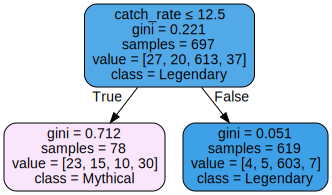

In [14]:
# Plot de tree. Maakt gebruik van methode hierboven
plot_tree_classification(dt, features, pokemon.status.unique())